# <div align="center">Perceptron<div>

<div align="center">The perceptron is a simplified model of a biological neuron.In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers.Single layer perceptrons are only capable of learning linearly separable patterns.<div>
    
![Test](./content_content_neuron.png)

In this notebook we shall replicate both the logical **AND** and **OR** gate using the **Perceptron Algorithm**.

## Logical OR gate using Perceptron

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Data set
Data = np.asarray([[0,0,0],
                   [0,1,1],
                   [1,0,1],
                   [1,1,1]])
#Features
X = Data[:,:2]
#Lables
y = Data[:,-1].reshape(-1,1)

#No Of Features
n = X.shape[1]
#No Of Training samples
m = y.size

#### Ploting The Data

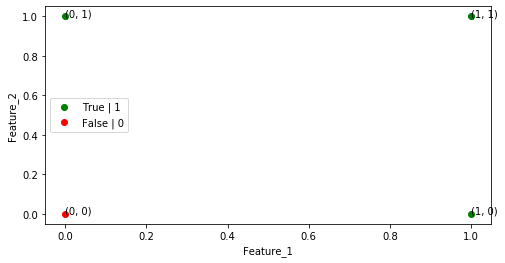

In [46]:
def Plot(X,y):
    plt.figure(figsize=(8,4)) 
    ones  = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
    zeros = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])
    plt.plot(ones[:,0],ones[:,1],'go',label='True | 1')
    plt.plot(zeros[:,0],zeros[:,1],'ro',label='False | 0')
    plt.xlabel('Feature_1')
    plt.ylabel('Feature_2')
    plt.legend(loc='best')
    for i_x, i_y in zip(ones[:,0], ones[:,1]):
        plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
    for i_x, i_y in zip(zeros[:,0], zeros[:,1]):
        plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
Plot(X,y)

#### Activation Function

In [3]:
#Here we shall use the Step Function for activation
def activationFn(Z):
    if(Z >= 0):
        return 1
    else:
        return 0

#### Weights and Bias

In [4]:
#Weights
W_initial = np.random.normal(0.0,pow(1,-0.5),(2,1))
#Bias
b_initial = np.random.normal(0.0,pow(1,-0.5),(1,1))

#### Perceptron Algorithm

In [5]:
epoch = 50
Lr = 0.3

def Perceptron(X_,y_,w,b,lr,e):
    
    for _ in range(e):
        for i in range(len(X_)):
            
            #Summation Step
            Z = np.dot(X_[i,:].reshape(1,2),w) + b
            #Activation Step
            Z = activationFn(Z)
            
            #Label = 0 and Predicted = 1
            if((y_[i]-Z) == -1):
                
                w -= X_[i,:].reshape(2,1)*lr
                b -= lr
            
            #Label = 1 and Predicted = 0
            elif((y_[i]-Z) == 1):
                
                w += X_[i,:].reshape(2,1)*lr
                b += lr
    return w,b

W_learned,b_learned = Perceptron(X,y,W_initial,b_initial,Lr,epoch)

#### Output Prediction

In [47]:
def Predict(Inputs,ww,bb,Y_):
    print("X1   X2   Output   Predicted")
    print()
    Z = np.dot(Inputs,ww)+bb
    for i in range(m):
        print(Inputs[i,0],'  ',Inputs[i,1],'    ',int(Y_[i]),'      ',activationFn(Z[i]))
Predict(X,W_learned,b_learned,y)

X1   X2   Output   Predicted

0    0      0        0
0    1      1        1
1    0      1        1
1    1      1        1


#### Plotting The Decision Boundary

The general equation of a line is  Ax + By - C = 0. The equation of our decision boundary is  W<sub>1</sub> X<sub>1</sub> + W<sub>2</sub> X<sub>2</sub> + b = 0. Let X1 be x and X2 be y then the equation becomes W<sub>1</sub> x + W<sub>2</sub> y + b = 0. Thus the X-Intercept and Y-Intercept of the decision boundary will be (-b/w<sub>1</sub>,0) and (0, -b/w<sub>2</sub>) using these two points we can find the slope to be (-w<sub>1</sub>/w<sub>2</sub>). Since we have both the slope and Y-Inercept we can use the slope form y = mx + c equation to find the decision boundary.

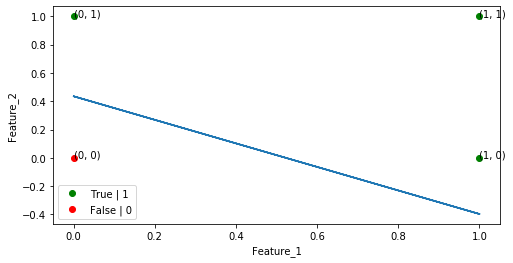

In [66]:
def Decision_Boundary(xx,wl,bl,yy):
    
    # X coordinates from the Data
    X_cords = xx[:,1].reshape(4,1)
    # Slope
    s = -1*(wl[0]/wl[1])
    # Y-Intercept
    c = -1*(bl/wl[1])
    # y = s*x + c
    Y_cords = (s*X_cords+c)
    
    Plot(xx,yy)
    plt.plot(X_cords,Y_cords)
    
Decision_Boundary(X,W_learned,b_learned,y)

## Logical AND gate using Perceptron

In [72]:
#Data set
Data1 = np.asarray([[0,0,0],
                   [0,1,0],
                   [1,0,0],
                   [1,1,1]])
#Features
X1 = Data1[:,:2]
#Lables
y1 = Data1[:,-1].reshape(-1,1)

#No Of Features
n1 = X1.shape[1]
#No Of Training samples
m1 = y1.size

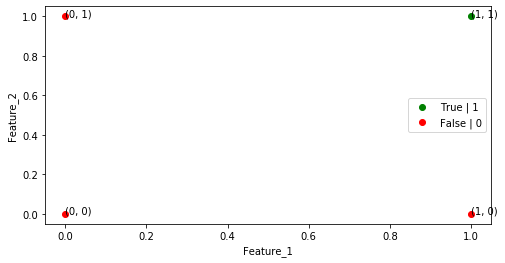

In [73]:
#Plotting the Data
Plot(X1,y1)

In [74]:
#Weights
W_initial1 = np.random.normal(0.0,pow(1,-0.5),(2,1))
#Bias
b_initial1 = np.random.normal(0.0,pow(1,-0.5),(1,1))

In [75]:
W_l1,b_l1 = Perceptron(X1,y1,W_initial1,b_initial1,Lr,epoch)

In [76]:
Predict(X1,W_l1,b_l1,y1)

X1   X2   Output   Predicted

0    0      0        0
0    1      0        0
1    0      0        0
1    1      1        1


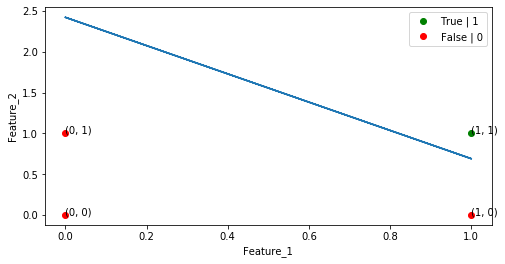

In [77]:
Decision_Boundary(X1,W_l1,b_l1,y1)